In [7]:
import pandas as pd
import numpy as np
data = pd.read_excel("Cleaned data.xlsx")

In [8]:
# !pip install neuralprophet
from neuralprophet import NeuralProphet
data = pd.DataFrame(data)

In [11]:
Tech = data[data['Category'] == 'Technology']
Tech


,Unnamed: 0,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
2,2,4920,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,...,Technology,Phones,GE 30522EE2,231.980,2,67.2742,0,Cards,NaN,NaN
4,4,8604,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.080,2,-5.2640,0,Online,NaN,NaN
5,5,8605,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,...,Technology,Accessories,WD My Passport Ultra 1TB Portable External Har...,165.600,3,-6.2100,0,Online,NaN,NaN
6,6,8606,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,...,Technology,Phones,AT&T 17929 Lendline Telephone,180.960,5,13.5720,0,Cards,NaN,NaN
9,9,2898,US-2019-164630,2019-01-04,2019-01-09,Standard Class,EB-13975,Erica Bern,Corporate,United States,...,Technology,Copiers,Hewlett Packard 310 Color Digital Copier,959.968,4,119.9960,0,Online,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,5847,9377,CA-2020-108756,2020-12-25,2020-12-29,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,...,Technology,Accessories,Memorex Micro Travel Drive 4 GB,379.800,3,13.6740,0,COD,NaN,NaN
5860,5860,2570,CA-2020-134404,2020-12-27,2020-12-27,Same Day,DR-12880,Dan Reichenbach,Corporate,United States,...,Technology,Phones,AT&T 1080 Corded phone,928.388,2,-35.6174,0,COD,NaN,NaN
5878,5878,574,CA-2020-164826,2020-12-28,2021-01-04,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,...,Technology,Phones,Cush Cases Heavy Duty Rugged Cover Case for Sa...,381.850,3,4.0095,0,COD,NaN,NaN
5885,5885,1879,CA-2020-118885,2020-12-29,2021-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,...,Technology,Phones,Adtran 1202752G1,156.376,3,22.6782,0,Online,NaN,NaN


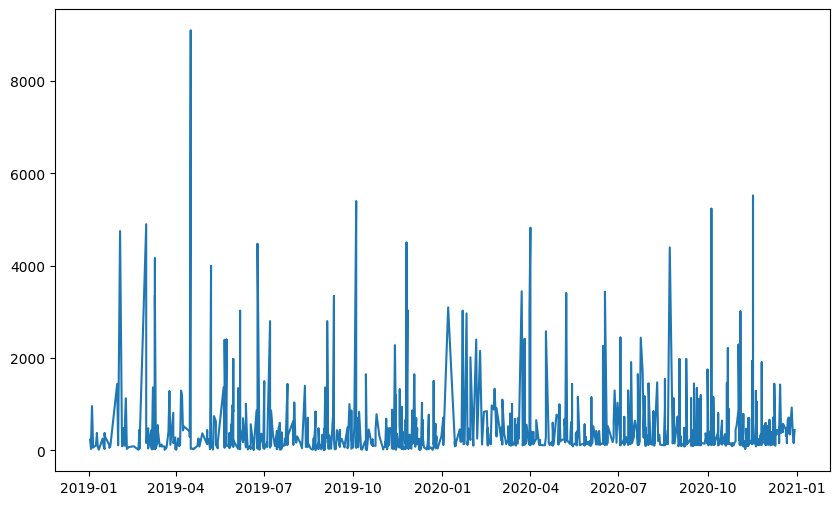

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(Tech['Order Date'], Tech['Sales'])
plt.show()

In [31]:
from logging import Filter
FileterdDataset = Tech[['Order Date', 'Sales']]
FileterdDataset.columns = ['ds', 'y']
FileterdDataset['ds'] = pd.to_datetime(FileterdDataset['ds'])
FilteredDataset = FileterdDataset.drop_duplicates(subset=['ds'])
FilteredDataset.reset_index(drop=True, inplace=True)
FilteredDataset


WARNING - (py.warnings._showwarnmsg) - <ipython-input-31-8664d85c869f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FileterdDataset['ds'] = pd.to_datetime(FileterdDataset['ds'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FileterdDataset['ds'] = pd.to_datetime(FileterdDataset['ds'])



,ds,y
0,2019-01-02,231.980
1,2019-01-03,30.080
2,2019-01-04,959.968
3,2019-01-05,191.472
4,2019-01-08,108.784
...,...,...
452,2020-12-25,352.480
453,2020-12-27,928.388
454,2020-12-28,381.850
455,2020-12-29,156.376


In [33]:
m = NeuralProphet()
m.fit(FilteredDataset, freq='D',epochs = 50)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 64.333% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 64.333% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (29) is too small than the required number                     for the learning rate finder (218). The results might not be optimal.


Finding best initial lr:   0%|          | 0/218 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 16. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 9. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.433927,0.0,1089.321899,1343.653442,0.433711,0.0,0
1,0.368090,0.0,953.322083,1261.617188,0.368672,0.0,1
2,0.314633,0.0,829.563538,1179.115845,0.316690,0.0,2
3,0.274408,0.0,732.481567,1103.152222,0.274635,0.0,3
4,0.238215,0.0,651.401794,1015.505615,0.236031,0.0,4
5,0.200303,0.0,574.054138,925.431824,0.199485,0.0,5
6,0.163752,0.0,491.186096,843.376587,0.162606,0.0,6
7,0.130621,0.0,413.846893,758.575317,0.129776,0.0,7
8,0.115726,0.0,380.683716,730.481812,0.116555,0.0,8
9,0.112938,0.0,369.275024,666.638916,0.111910,0.0,9


In [47]:
future = m.make_future_dataframe(FilteredDataset, periods=120)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 64.333% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 64.333% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_weekly
0,2020-12-31,None,303.948181,327.115601,-23.167425
1,2021-01-01,None,333.397156,327.601105,5.796067
2,2021-01-02,None,329.803040,328.086578,1.716482
3,2021-01-03,None,406.095886,328.572052,77.523819
4,2021-01-04,None,315.333466,329.057587,-13.724098


In [48]:
plot1 = m.plot(forecast)
plot1.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [49]:
plot2 =  m.plot_components(forecast)
plot2.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
